In [1]:
import pandas as pd
import numpy as np
import shutil
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import os
from datetime import datetime
import seaborn as sns
from pandas.plotting import parallel_coordinates

from sklearn.preprocessing import OneHotEncoder, StandardScaler, normalize, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.utils.class_weight import compute_class_weight
from sklearn.model_selection import train_test_split, ParameterGrid
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score, classification_report

from tensorflow.keras import Model, layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout, GaussianNoise
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, CSVLogger
from tensorflow.keras.regularizers import l2
from tensorflow.keras.models import load_model

2023-12-08 19:03:24.225977: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# In the preprocess file the unseen test data was saved and it will be used here

# Directory where the datasets are saved
load_dir = '/Users/sepuliini/Desktop/Preprocessed_data'

# Load each dataset
x_unseen = np.load(os.path.join(load_dir, 'x_unseen.npy'))
y_test_unseen = np.load(os.path.join(load_dir, 'y_test_unseen.npy'))

# Path to the directory containing 'saved_model.pb'
model_dir = '/Users/sepuliini/Desktop/NN'

# Load the saved model
classifier = load_model(model_dir)

In [3]:
# Predicting on unseen test data
preds_scaled = classifier.predict(x_unseen)
# Converting probabilities to binary predictions
preds = (preds_scaled > 0.5).astype('int')
preds.shape, x_unseen.shape

# Calculating the accuracy on unseen test data
accuracy = accuracy_score(y_test_unseen, preds)

print(f"Accuracy: {accuracy}")

4384/4384 [==============================] - 5s 990us/step
Accuracy: 0.9168763767795656


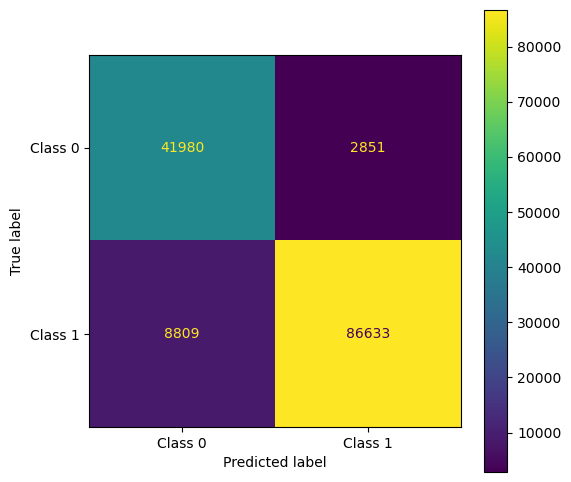

In [4]:
# Generating and displaying the confusion matrix
cm = confusion_matrix(y_test_unseen, preds)
fig, ax = plt.subplots(figsize=(6,6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Class 0", "Class 1"])
disp.plot(ax=ax)
plt.show()

In [5]:
# Calculating additional evaluation metrics
acc = accuracy_score(y_test_unseen, preds)
prec = precision_score(y_test_unseen, preds, average="binary")
rec = recall_score(y_test_unseen, preds, average="binary")
f1_score_value = f1_score(y_test_unseen, preds, average="binary")

# Printing the summary of binary classification results
title = f"Binary classification results: \n ACC {acc:.5f}, PREC: {prec:.5f}, REC {rec:.5f}, F1 {f1_score_value:.5f}"
print(title, "\n", classification_report(y_test_unseen, preds, target_names=["Class 0", "Class 1"]))

Binary classification results: 
 ACC 0.91688, PREC: 0.96814, REC 0.90770, F1 0.93695 
               precision    recall  f1-score   support

     Class 0       0.83      0.94      0.88     44831
     Class 1       0.97      0.91      0.94     95442

    accuracy                           0.92    140273
   macro avg       0.90      0.92      0.91    140273
weighted avg       0.92      0.92      0.92    140273



# Analysis Report: Binary Classification Model

The binary classification model's performance is analyzed based on the provided metrics. Below is a detailed analysis:

### Binary Classification Results

| Metric     | Score    |
|------------|----------|
| Accuracy   | 0.91688  |
| Precision  | 0.96814  |
| Recall     | 0.90770  |
| F1 Score   | 0.93695  |

### Classification Report

| Class      | Precision | Recall  | F1-Score | Support |
|------------|-----------|---------|----------|---------|
| Class 0    | 0.83      | 0.94    | 0.88     | 44831   |
| Class 1    | 0.97      | 0.91    | 0.94     | 95442   |
|            |           |         |          |         |
| **Accuracy** |         |         | **0.92**  | 140273  |
| **Macro Avg** | 0.90    | 0.92    | 0.91     | 140273  |
| **Weighted Avg** | 0.92 | 0.92    | 0.92     | 140273  |

## Model Performance Analysis

### Overall Metrics

- **Accuracy**: 91.688%, indicating the model's high rate of correctly classifying both attack and non-attack instances.
- **Precision (Class 1)**: 96.814%, reflecting the model's reliability in predicting network attacks.
- **Recall (Class 1)**: 90.770%, showing the model's ability to identify most of the actual attack instances.
- **F1 Score**: 93.695%, representing a balanced measure of precision and recall.

### Class-wise Breakdown

- **Class 0 (Non-Attacks)**:
  - Precision: 83%, suggesting a moderate rate of false positives.
  - Recall: 94%, indicating high sensitivity in detecting true non-attack instances.
- **Class 1 (Attacks)**:
  - Precision: 97%, denoting a high rate of correctly identified attacks.
  - Recall: 91%, confirming the model's effectiveness in capturing attack instances.

### Averages

- **Macro Average**: Balanced performance across both classes.
- **Weighted Average**: Robust performance considering class imbalance.

## Learning Behavior and Model Insights

- **Strengths**: High precision in detecting attacks makes the model particularly useful for scenarios where the cost of missing an attack is high.
- **Limitations**: The model shows a higher rate of false positives for Class 0, indicating room for improvement in distinguishing non-attack instances.

## Recommendations for Improvement

1. **Reducing False Positives**: Investigate features leading to false positives in Class 0.
2. **Hyperparameter Tuning**: Experiment with hyperparameters, including the number of layers, neurons, and learning rate, to optimize model performance further.
3. **Extended Feature Engineering**: Explore additional feature engineering techniques to enhance model capability, especially for features that are significant in identifying non-attack instances.
